## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df=pd.read_csv("../data/credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Class Distribution

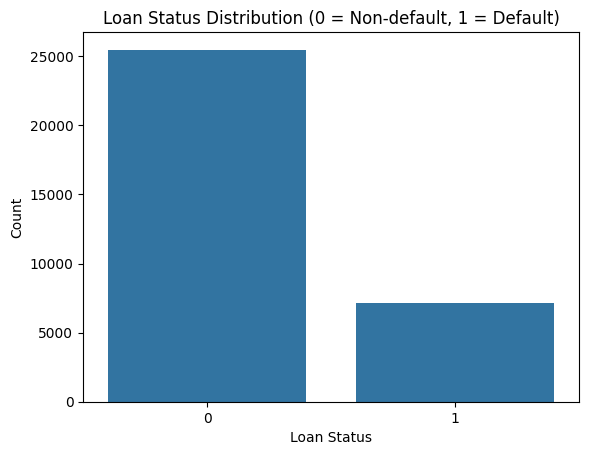

In [12]:
sns.countplot(x="loan_status", data=df)
plt.title("Loan Status Distribution (0 = Non-default, 1 = Default)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

Insight:
Most applicants have low risk

## Age vs Default

In [7]:
df["age_group"] = pd.cut(df["person_age"],bins=[18, 25, 35, 50, 100],labels=["18-25", "26-35", "36-50", "50+"])

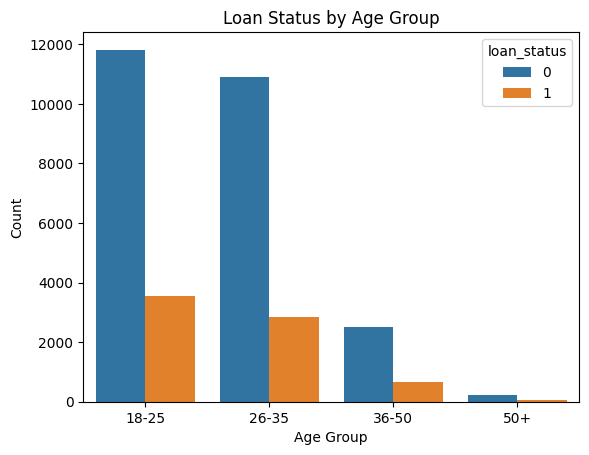

In [19]:
sns.countplot(x="age_group", hue="loan_status", data=df)
plt.title("Loan Status by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

Insight:
Applicants within age group 18-25 have the highest number with most defaults (high risk)

## Income vs Default

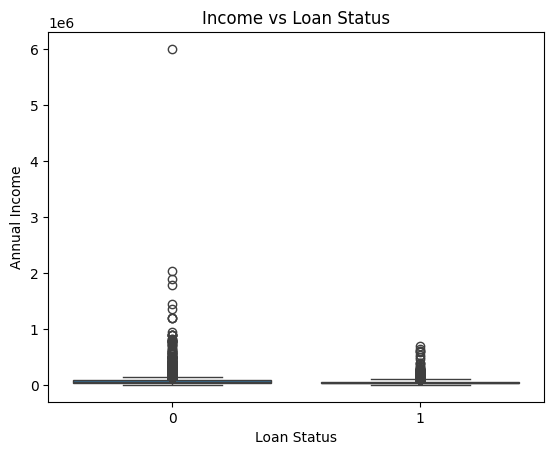

In [21]:
sns.boxplot(x="loan_status", y="person_income", data=df)
plt.title("Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.show()

Insight:
Applicants with low risk have higher annual income than applicants with high risk

## Credit behavior analysis

### Loan Grade vs Default

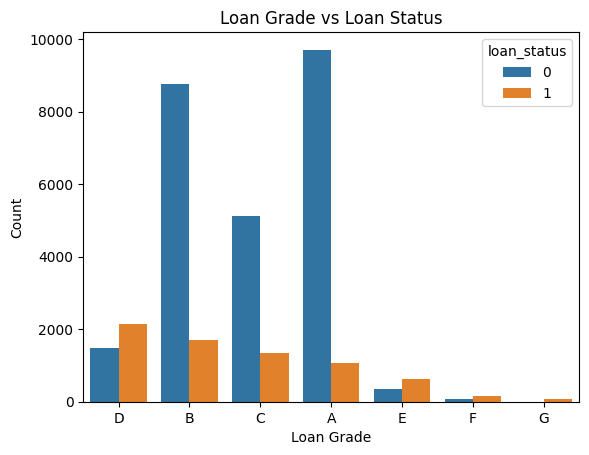

In [22]:
sns.countplot(x="loan_grade", hue="loan_status", data=df)
plt.title("Loan Grade vs Loan Status")
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.show()

Insight:
Most applicants have loan grade as A followed by B, but, most high risk applicants are in loan grade D

### Historical Default vs Loan Status

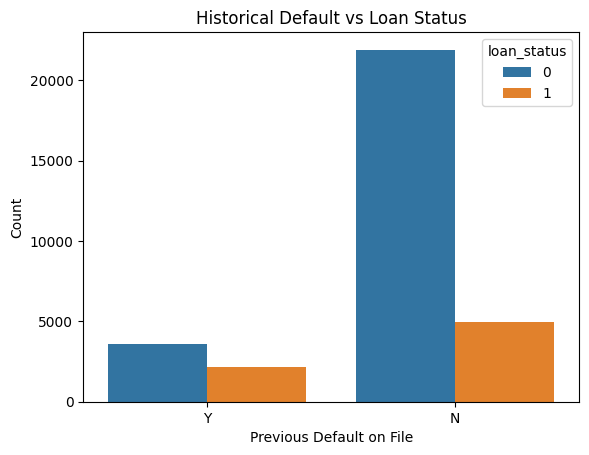

In [23]:
sns.countplot(x="cb_person_default_on_file", hue="loan_status", data=df)
plt.title("Historical Default vs Loan Status")
plt.xlabel("Previous Default on File")
plt.ylabel("Count")
plt.show()

Insight:
There are more risky applicants with no historical default because that group is much larger overall.
Proportionally, applicants with past defaults are still riskier.

## Heatmap

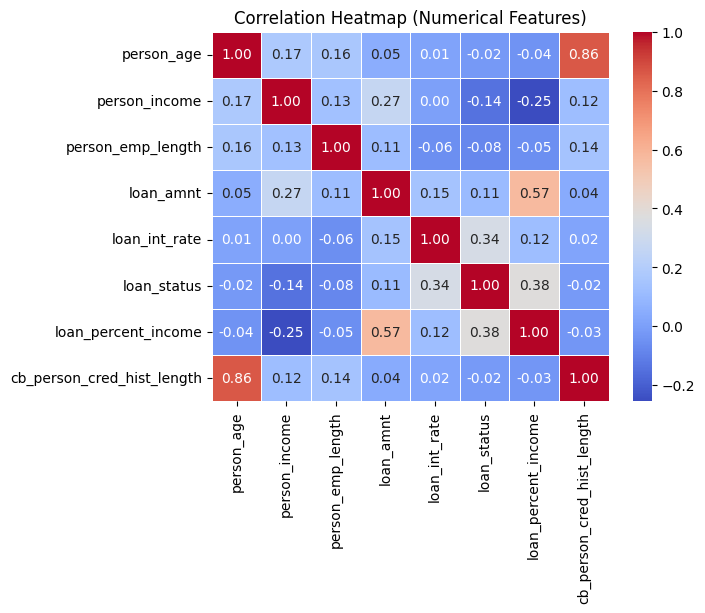

In [25]:
num_cols = df.select_dtypes(include=["int64", "float64"])
corr = num_cols.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

Insight:
'loan_status' has low pearson correlation with all features

## Outlier Analysis

### Income Outliers

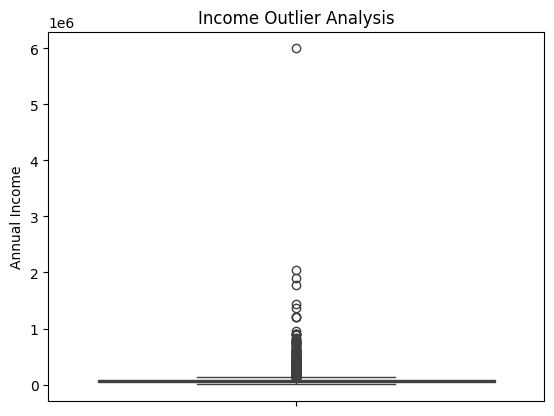

In [26]:
sns.boxplot(y=df["person_income"])
plt.title("Income Outlier Analysis")
plt.ylabel("Annual Income")
plt.show()

Insight:
There are some outliers in applicants annual incomes

### Loan Amount Outliers

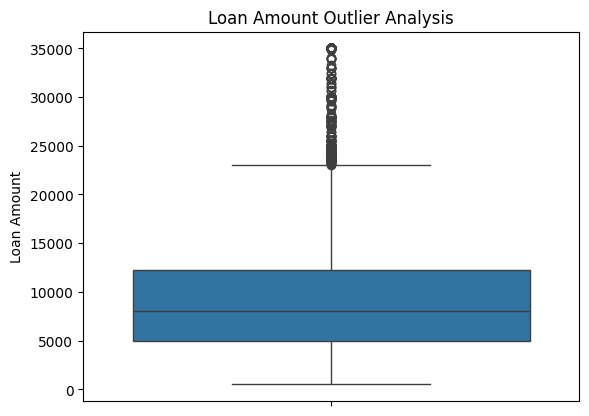

In [27]:
sns.boxplot(y=df["loan_amnt"])
plt.title("Loan Amount Outlier Analysis")
plt.ylabel("Loan Amount")
plt.show()

Insight:
Most of the applicants have a loan requirement within 12500 to 5000 but there are some with high loan requirements like 35000 as well

### Interest Rate Outliers

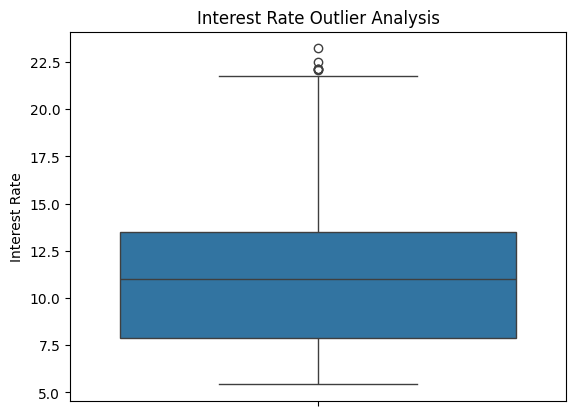

In [28]:
sns.boxplot(y=df["loan_int_rate"])
plt.title("Interest Rate Outlier Analysis")
plt.ylabel("Interest Rate")
plt.show()

Insight:
Most applicants have got a loan within interest rate of 12.5 to 7.5 but some have recevied upto 22.5 as well